# Частина третя: Аналіз датасет c Kaggle.com

## Прочитайте csv файл (використовуйте функцію read_csv)

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('bestsellers with categories.csv')

## Виведіть перші п'ять рядків (використовується функція head)

In [2]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


## Виведіть розміри датасету (використовуйте атрибут shape)

In [3]:
df.shape

(550, 7)

### *Питання:* Про скільки книг зберігає дані датасет?
*Відповідь:* 550 книг

## Для спрощення подальшої роботи давайте трохи підправимо назви змінних.

In [4]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.columns

Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')

## Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [5]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

### *Питання:* Чи є в якихось змінних пропуски? (Так / ні)
*Відповідь:* Ні

## Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique) 

In [6]:
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

## *Питання:* Які є унікальні жанри?
*Відповідь:* Non Fiction, Fiction


## Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

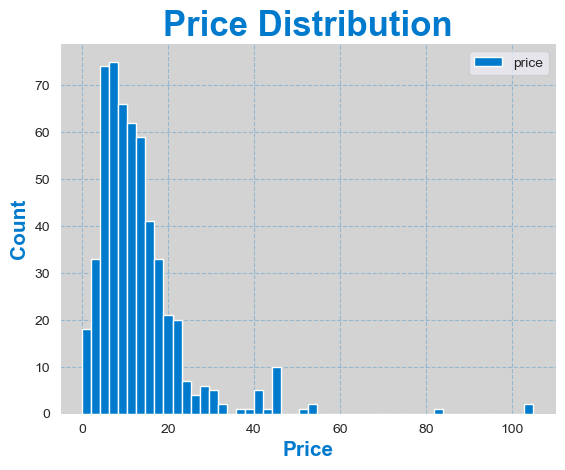

In [7]:
fig, ax = plt.subplots()
ax.set_facecolor('lightgrey')

df.plot(kind='hist', y='price', bins=50, color='#007acc', edgecolor='white', linewidth=1, ax=ax)
plt.xlabel('Price', fontsize=15, fontweight='bold', color='#007acc')
plt.ylabel('Count', fontsize=15, fontweight='bold', color='#007acc')
plt.title('Price Distribution', fontsize=25, fontweight='bold', color='#007acc')
plt.grid(alpha=0.3, linestyle='--', color='#007acc')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

### *Питання:* Максимальна ціна?

In [8]:
print(f" Відповідь: {df['price'].max()}")

 Відповідь: 105


### *Питання:* Мінімальна ціна?

In [9]:
print(f" Відповідь: {df['price'].min()}")

 Відповідь: 0


### *Питання:*  Середня ціна?

In [10]:
print(f" Відповідь: {df['price'].mean()}")

 Відповідь: 13.1


### *Питання:* Медіанна ціна?

In [11]:
print(f" Відповідь: {df['price'].median()}")

 Відповідь: 11.0


## Пошук та сортування даних

### *Питання:* Який рейтинг у датасеті найвищий?

In [12]:
print(f" Відповідь: {df['user_rating'].max()}")

 Відповідь: 4.9


### *Питання:* Скільки книг мають такий рейтинг?

In [13]:
print(f" Відповідь: {df[df['user_rating'] == 4.9].value_counts().sum()}")

 Відповідь: 52


### *Питання:* Яка книга має найбільше відгуків?


In [14]:
print(f" Відповідь: {df['reviews'].max()}")

 Відповідь: 87841


### *Питання:*  З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?


In [15]:
df_2015 = df[(df['year'] == 2015)]
most_expensive = df_2015.loc[df_2015['price'] == df_2015['price'].max()]
print(f"Відповідь: {most_expensive.iloc[0, 0]}")


Відповідь: Publication Manual of the American Psychological Association, 6th Edition


### *Питання:* Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? 

In [16]:
print(f" Відповідь: {len(df[(df['year'] == 2010) & (df['genre'] == 'Fiction')])}")

 Відповідь: 20


### *Питання:* Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?

In [17]:
highest_rating_2010_2011 =  df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))].value_counts().sum()
print(f" Відповідь: {highest_rating_2010_2011}")

 Відповідь: 1


### Давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [18]:
df_2015_sorted_by_price = df_2015[df_2015['price'] < 8].sort_values(by='price', ascending=True)
df_2015_sorted_by_price

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


### *Питання:* Яка книга остання у відсортованому списку?

In [19]:
print(f" Відповідь: {df_2015_sorted_by_price.iloc[-1]['name']}")

 Відповідь: Old School (Diary of a Wimpy Kid #10)


## Агрегування даних та з'єднання таблиць

### Давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min)

In [20]:
df.groupby('genre').agg({'price': ['max', 'min']})

price    
              max min
genre                
Fiction        82   0
Non Fiction   105   0

### *Питання:* Максимальна ціна для жанру Fiction:
Відповідь: 82


### *Питання:* Мінімальна ціна для жанру Fiction:
Відповідь: 0

### *Питання:* Максимальна ціна для жанру Non Fiction: 
Відповідь: 105

### *Питання:* Мінімальна ціна для жанру Non Fiction:
Відповідь: 0

### Cтворіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count)

In [21]:
books_by_author = df.groupby('author', as_index=False).agg(number_of_books=('name', 'count'))
books_by_author

,author,number_of_books
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2
246,Wizards RPG Team,3


### *Питання:* Якої розмірності вийшла таблиця?

In [22]:
print(f" Відповідь: {books_by_author.shape}")

 Відповідь: (248, 2)


### *Питання:* Який автор має найбільше книг?

In [23]:
print(f" Відповідь: {books_by_author[books_by_author['number_of_books'] == books_by_author['number_of_books'].max()]['author'].values[0]}")

 Відповідь: Jeff Kinney


### *Питання:* Скільки книг цього автора?

In [24]:
print(f" Відповідь: {books_by_author[books_by_author['author'] == 'Jeff Kinney']['number_of_books'].values[0]}")

 Відповідь: 12


## Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean).

In [25]:
author_rating = df.groupby('author', as_index=False).agg(mean_rating=('user_rating', 'mean')).round(2)
author_rating

,author,mean_rating
0,Abraham Verghese,4.60
1,Adam Gasiewski,4.40
2,Adam Mansbach,4.80
3,Adir Levy,4.80
4,Admiral William H. McRaven,4.70
...,...,...
243,Walter Isaacson,4.57
244,William Davis,4.40
245,William P. Young,4.60
246,Wizards RPG Team,4.80


### *Питання:* У якого автора середній рейтинг мінімальний?

In [26]:
print(f" Відповідь: {author_rating[author_rating['mean_rating'] == author_rating['mean_rating'].min()]['author'].values[0]}")

 Відповідь: Donna Tartt


### *Питання:* Який у цього автора середній рейтинг? 

In [27]:
print(f" Відповідь: {author_rating[author_rating['author'] == 'Donna Tartt']['mean_rating'].values[0]}")

 Відповідь: 3.9


## З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [28]:
df_united = pd.concat([books_by_author, author_rating], axis=1)
df_united = df_united.loc[:,~df_united.columns.duplicated()]
df_united

,author,number_of_books,mean_rating
0,Abraham Verghese,2,4.60
1,Adam Gasiewski,1,4.40
2,Adam Mansbach,1,4.80
3,Adir Levy,1,4.80
4,Admiral William H. McRaven,1,4.70
...,...,...,...
243,Walter Isaacson,3,4.57
244,William Davis,2,4.40
245,William P. Young,2,4.60
246,Wizards RPG Team,3,4.80


## Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [29]:
sorted_by_number_and_rating = df_united.sort_values(by=['number_of_books', 'mean_rating'], ascending=True)
sorted_by_number_and_rating

,author,number_of_books,mean_rating
171,Muriel Barbery,1,4.00
43,Chris Cleave,1,4.10
109,Ian K. Smith M.D.,1,4.10
186,Pierre Dukan,1,4.10
81,Elizabeth Strout,1,4.20
...,...,...,...
11,American Psychological Association,10,4.50
226,Suzanne Collins,11,4.66
92,Gary Chapman,11,4.74
197,Rick Riordan,11,4.77


### *Питання:* Який автор перший у списку?

In [30]:
print(f" Відповідь: {sorted_by_number_and_rating.iloc[0, 0]}")

 Відповідь: Muriel Barbery


# Візуалізації

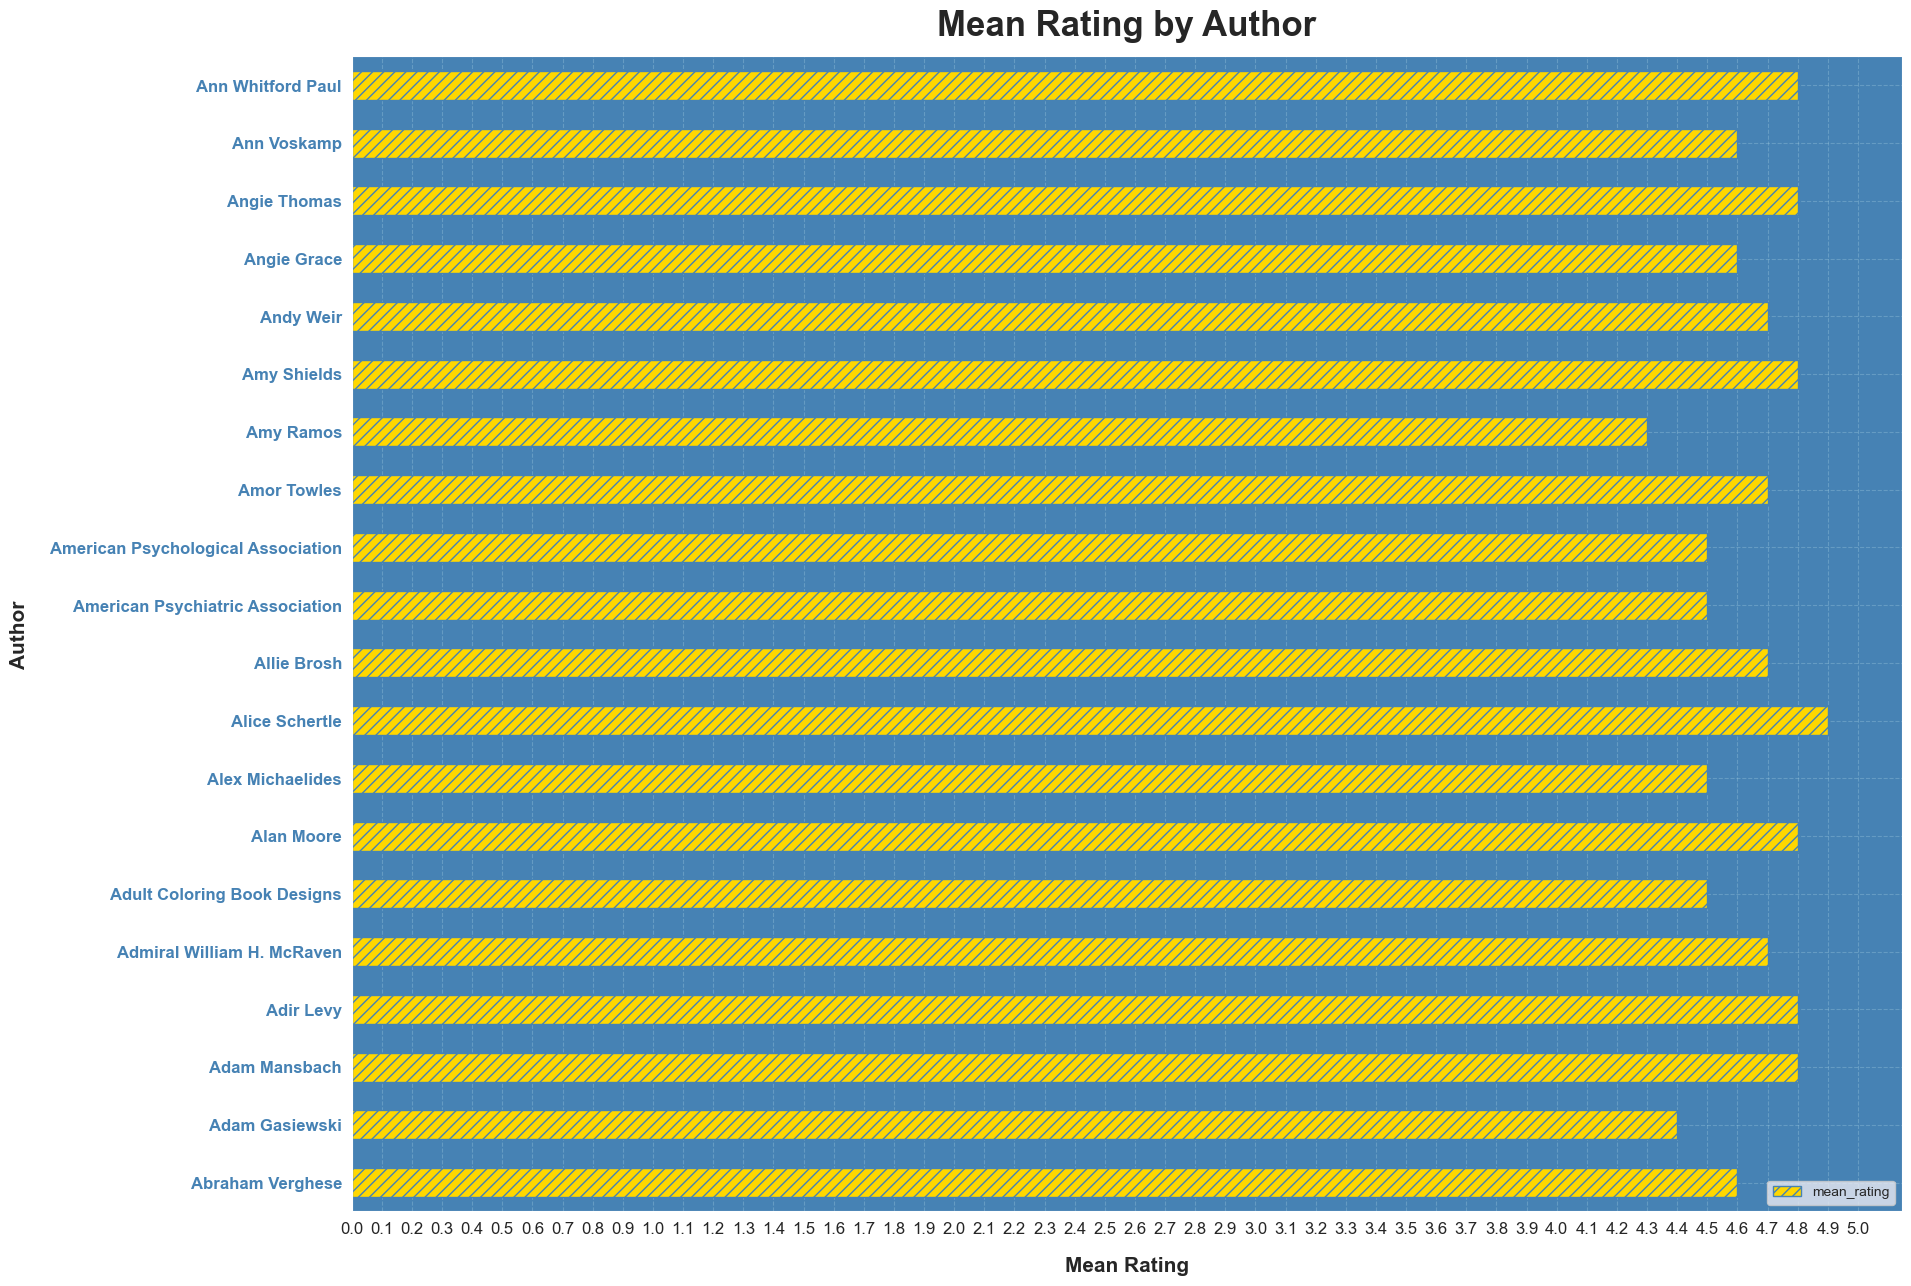

In [31]:
fig, ax = plt.subplots()
ax.set_facecolor('steelblue')

df_united[:20].plot(y='mean_rating', x='author', kind='barh', color='gold', edgecolor='steelblue', hatch='///',  figsize=(20, 15),  ax=ax)
plt.ylabel('Author', fontsize=15, fontweight='bold', labelpad=15)
plt.xlabel('Mean Rating', fontsize=15, fontweight='bold', labelpad=15)
plt.title('Mean Rating by Author', fontsize=25, fontweight='bold', pad=15)
plt.xticks(np.arange(0, 5.1, 0.1), fontsize=12)
plt.yticks(fontsize=12, fontweight='bold', color='steelblue')
plt.grid(color='lightblue', alpha=0.3, linestyle='--')
plt.show()


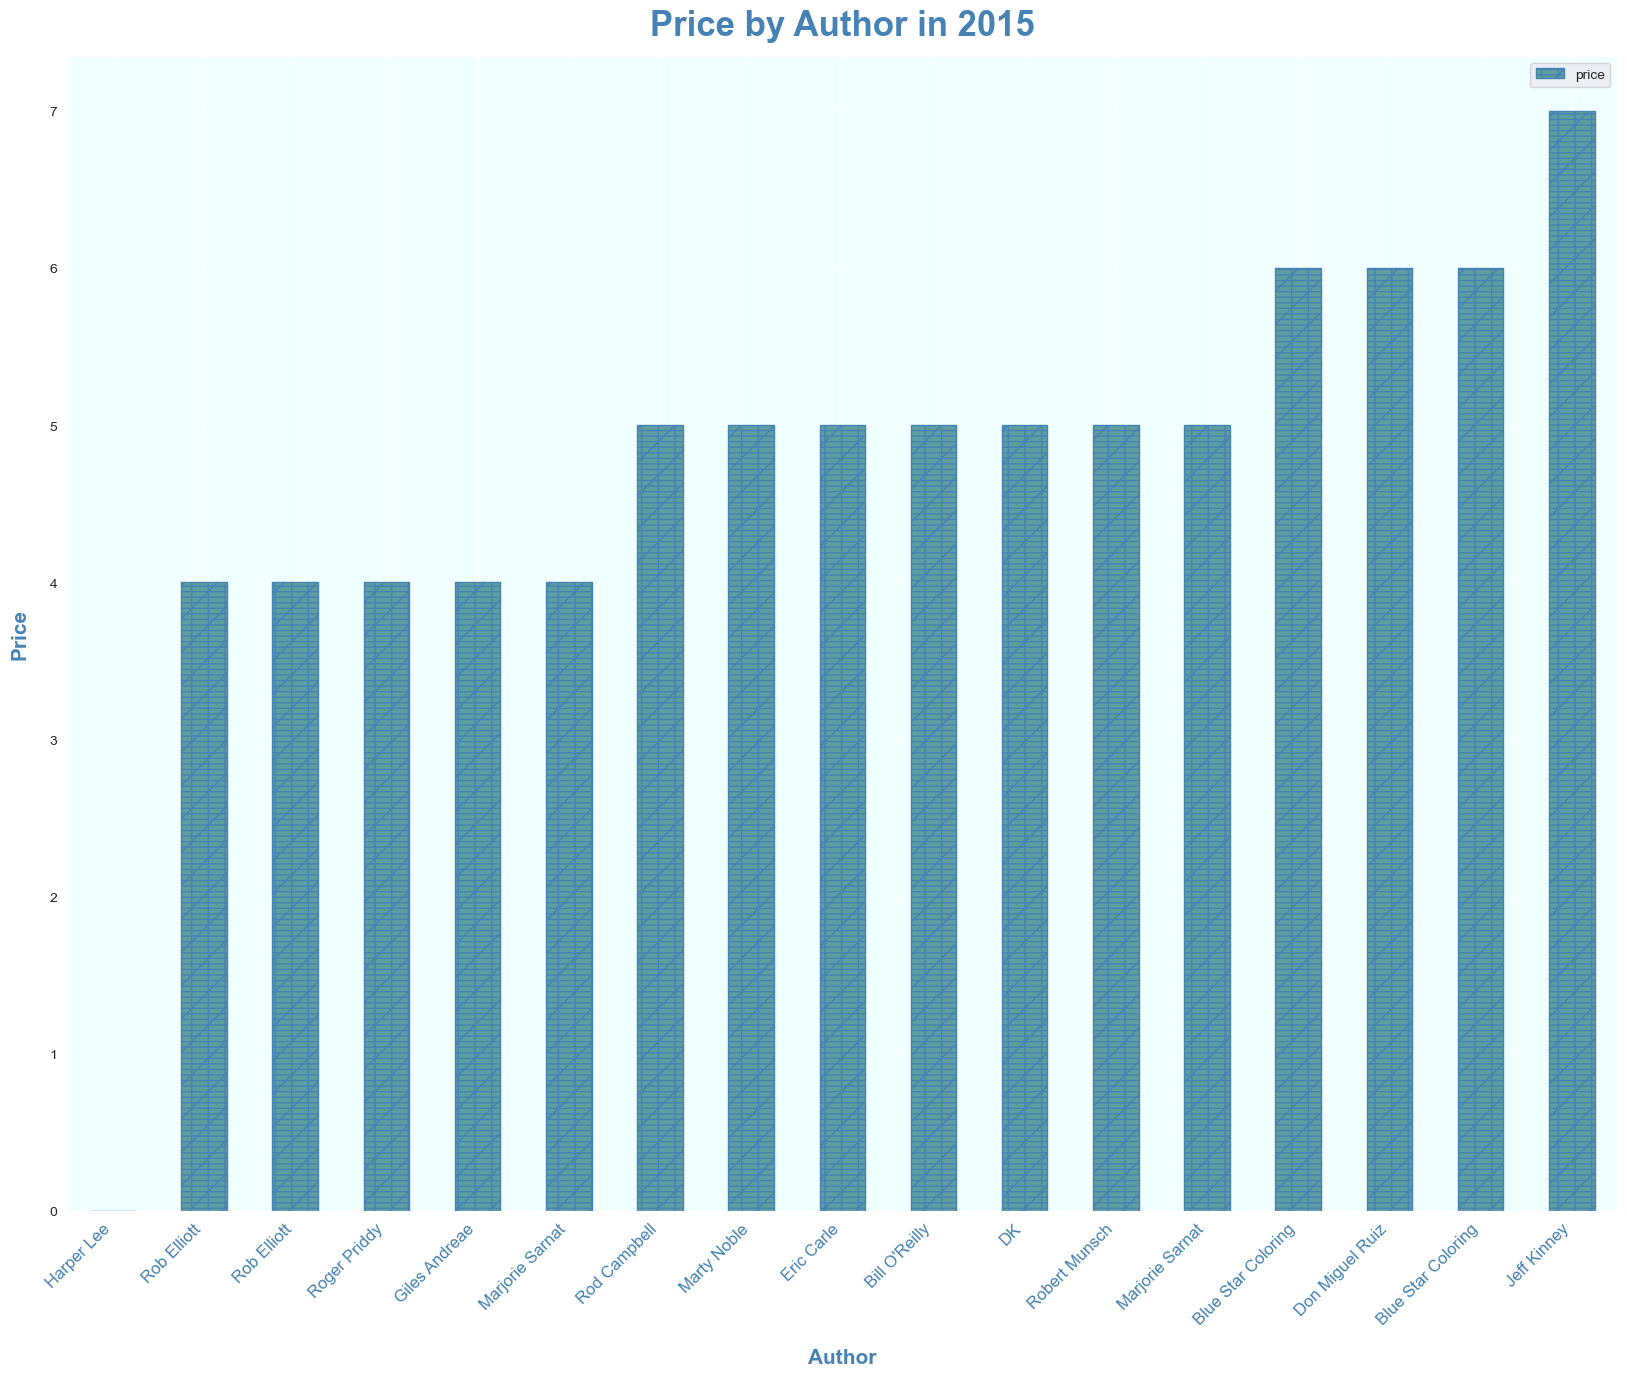

In [32]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_facecolor('azure')

df_2015_sorted_by_price.plot(y='price', x='author', kind='bar', color='cadetblue', edgecolor='steelblue', hatch='/-+-', ax=ax)
plt.xlabel('Author', fontsize=15, color='steelblue', fontweight='bold', labelpad=15)
plt.ylabel('Price', fontsize=15, color='steelblue', fontweight='bold', labelpad=15)
plt.title('Price by Author in 2015', fontsize=25, color='steelblue', fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right', color='steelblue', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()